In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy import signal
from PIL import Image
import cv2

In [27]:
def plot(data, title):
    plot.i += 1
    plt.subplot(3,3,plot.i)
    plt.imshow(data)
    plt.gray()
    plt.title(title)

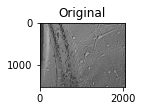

In [28]:
plot.i = 0
# Load the data...
im = Image.open('F3.tif')
data = np.array(im, dtype=float)
plot(data, 'Original')

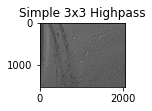

In [70]:
# A very simple and very narrow highpass filter
kernel = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]])
highpass_3x3 = ndimage.convolve(data, kernel)
plot(highpass_3x3, 'Simple 3x3 Highpass')

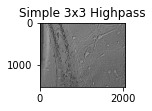

In [71]:
# A very simple and very narrow highpass filter
kernel = np.array([[0, -1, 0],
                   [-1,  5, -1],
                   [0, -1, 0]])
highpass_3x3 = ndimage.convolve(data, kernel)
plot(highpass_3x3, 'Simple 3x3 Highpass')

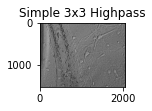

In [72]:
# A very simple and very narrow highpass filter
kernel = np.array([[1, -2, 1],
                   [-2,  5, -2],
                   [1, -2, 1]])
highpass_3x3 = ndimage.convolve(data, kernel)
plot(highpass_3x3, 'Simple 3x3 Highpass')

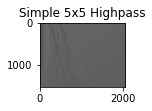

In [73]:
# A slightly "wider", but sill very simple highpass filter 
kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  5,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])
highpass_5x5 = ndimage.convolve(data, kernel)
plot(highpass_5x5, 'Simple 5x5 Highpass')

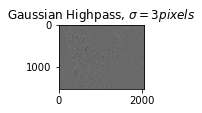

In [74]:
# Another way of making a highpass filter is to simply subtract a lowpass
# filtered image from the original. Here, we'll use a simple gaussian filter
# to "blur" (i.e. a lowpass filter) the original.
lowpass = ndimage.gaussian_filter(data, 5)
gauss_highpass = data - lowpass
plot(gauss_highpass, r'Gaussian Highpass, $\sigma = 3 pixels$')

plt.show()

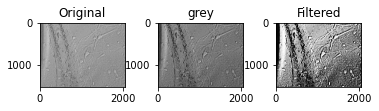

In [75]:
#Code for histogram equalization
img = cv2.imread('F3.tif', 1)
#cv2.imshow("img",img)
#equ = cv2.equalizeHist(img)
plot(img, 'Original')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plot(imgray, 'grey')
equ = cv2.equalizeHist(imgray)
plot(equ, 'Filtered')
#cv2.imshow('equ', equ)

#Code for contrast limited adaptive histogram equalization
#clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
#cl2 = clahe.apply(imgray)
#cv2.imshow('clahe2', cl2)

In [76]:
def butterLow(cutoff, critical, order):
    normal_cutoff = float(cutoff) / critical
    b, a = signal.butter(order, normal_cutoff, btype='lowpass')
    return b, a

In [77]:
def butterFilter(data, cutoff_freq, nyq_freq, order):
    b, a = butterLow(cutoff_freq, nyq_freq, order)
    y = signal.filtfilt(b, a, data)
    return y

In [78]:
#J'ai essayé le Butterworth filter mais pas réussi, à voir si on a vraiment besoin

x=np.array(img)
cutoff_frequency = 0.6
sample_rate = 10 *2 +1

y = butterFilter(x, cutoff_frequency, sample_rate/2, 10)

ValueError: The length of the input vector x must be greater than padlen, which is 33.

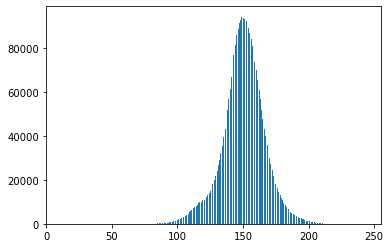

In [82]:
# Hisatogram of pixel values (for thresholding)
# calculate mean value from RGB channels and flatten to 1D array
vals = img.mean(axis=2).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

# not possible to separate via thresholding

In [65]:
# Edge detection 

# Read the original image
# Display original image
cv2.imshow('Original', img)
cv2.waitKey(0)

# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img, (3,3), 0) 

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)

# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)

cv2.destroyAllWindows()

# does not work

C:\Users\james\AppData\Local\Temp/ipykernel_17380/3384356779.py:12: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray_image = skimage.color.rgb2gray(gray_image)


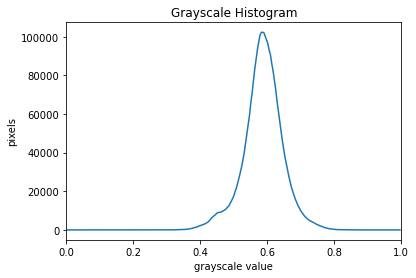

In [8]:
# Let's try gray + denoise + filter + thresholding

import glob
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.color
import skimage.filters
import cv2

image = skimage.io.imread("F3.tif")
gray_image = skimage.color.rgb2gray(gray_image)
#equ = cv2.equalizeHist(gray_image)
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)
plt.show()

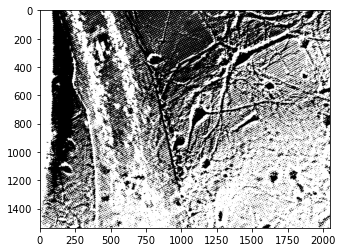

In [24]:
# create a mask based on the threshold
#t = skimage.filters.threshold_otsu(image)
#b = 0.45
t = 0.6
binary_mask = blurred_image < t
#binary_mask = binary_mask > b

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap='gray')
plt.show()

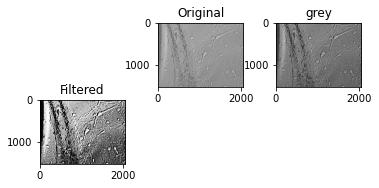

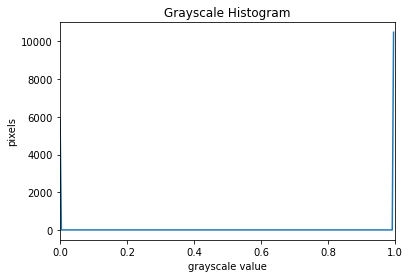